In [1]:
%%capture
!git clone --single-branch --branch v0.2dev https://github.com/scikit-learn-contrib/py-earth.git
%cd py-earth
!python setup.py install --cythonize
!pip install catboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LogisticRegression, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score,train_test_split, GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor ,AdaBoostRegressor
import itertools as it
import time as time
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from pyearth import Earth

In [2]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
y_train = y_train.quality.values
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
y_test = y_test.quality.values

In [ ]:
model_gb = GradientBoostingRegressor(n_estimators = 1300, loss = 'huber', max_depth = 9, 
                                     learning_rate = 0.08, subsample = 0.85, 
                                     random_state = 1).fit(X_train, y_train)
gb_pred_train = model_gb.predict(X_train)
gb_pred_test = model_gb.predict(X_test)
print("Gradient boost train RMSE =", np.sqrt(mean_squared_error(np.around(gb_pred_train), y_train)))
print("Gradient boost test RMSE =", np.sqrt(mean_squared_error(np.around(gb_pred_test), y_test)))

Gradient boost train RMSE = 0.02402615469220623
Gradient boost test RMSE = 0.6586699885725429


In [ ]:
model_xgb = XGBRegressor(n_estimators = 4050, max_depth = 7, 
                         learning_rate = 0.01, subsample = 0.5, 
                         reg_lambda = 10, gamma = 0, colsample_bytree = 0.6,
                         random_state = 1).fit(X_train, y_train)
xgb_pred_train = model_xgb.predict(X_train)
xgb_pred_test = model_xgb.predict(X_test)
print("xgb train RMSE =", np.sqrt(mean_squared_error(np.around(xgb_pred_train), y_train)))
print("xgb test RMSE =", np.sqrt(mean_squared_error(np.around(xgb_pred_test), y_test)))

xgb train RMSE = 0.16587909616044325
xgb test RMSE = 0.6753916242846414


In [ ]:
model_ada = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth=13),
                              n_estimators = 1500, 
                              learning_rate = 1.5, 
                              random_state = 45).fit(X_train,y_train)   
ada_pred_train = model_ada.predict(X_train)
ada_pred_test = model_ada.predict(X_test)
print("Adaboost train RMSE =", np.sqrt(mean_squared_error(np.around(ada_pred_train), y_train)))
print("Adaboost test RMSE =", np.sqrt(mean_squared_error(np.around(ada_pred_test), y_test)))

Adaboost train RMSE = 0.0
Adaboost test RMSE = 0.6604194471348085


In [ ]:
model_rf = RandomForestRegressor(n_estimators= 3000, 
                                 max_features = 7, 
                                 max_samples = 5000, 
                                 max_depth = 50, 
                                 random_state = 1, 
                                 n_jobs = -1).fit(X_train, y_train)
rf_pred_train = model_rf.predict(X_train)
rf_pred_test = model_rf.predict(X_test)
print("Random forest train RMSE =", np.sqrt(mean_squared_error(np.around(rf_pred_train), y_train)))
print("Random forest test RMSE =", np.sqrt(mean_squared_error(np.around(rf_pred_test), y_test)))

Random forest train RMSE = 0.2029226514289605
Random forest test RMSE = 0.6690981300917733


In [ ]:
model_dt = DecisionTreeRegressor(max_leaf_nodes = 52,
                                 max_depth = 6, 
                                 min_samples_leaf = 8, 
                                 random_state = 45).fit(X_train, y_train)
dt_pred_train = model_dt.predict(X_train)
dt_pred_test = model_dt.predict(X_test)
print("Decision tree train RMSE =", np.sqrt(mean_squared_error(np.around(dt_pred_train), y_train)))
print("Decision tree test RMSE =", np.sqrt(mean_squared_error(np.around(dt_pred_test), y_test)))

Decision tree train RMSE = 0.7266339665201115
Decision tree test RMSE = 0.8043152845265822


In [ ]:
model_cat = CatBoostRegressor(verbose = False).fit(X_train, y_train)
cat_pred_train = model_cat.predict(X_train)
cat_pred_test = model_cat.predict(X_test)
print("Catboost train RMSE =", np.sqrt(mean_squared_error(np.around(cat_pred_train), y_train)))
print("Catboost test RMSE =", np.sqrt(mean_squared_error(np.around(cat_pred_test), y_test)))

Catboost train RMSE = 0.4760979229626765
Catboost test RMSE = 0.7130648907789097


In [ ]:
model_lgbm = LGBMRegressor().fit(X_train, y_train)
lgbm_pred_train = model_lgbm.predict(X_train)
lgbm_pred_test = model_lgbm.predict(X_test)
print("lgbm train RMSE =", np.sqrt(mean_squared_error(np.around(lgbm_pred_train), y_train)))
print("lgbm test RMSE =", np.sqrt(mean_squared_error(np.around(lgbm_pred_test), y_test)))

lgbm train RMSE = 0.5210592961182009
lgbm test RMSE = 0.7258946734362203


In [ ]:
# MARS model 
mars_model = Earth(max_terms = 800, max_degree = 7)
mars_model.fit(X_train, y_train)
pred_opt = mars_model.predict(X_test)
rounded_pred_opt = [round(p) for p in pred_opt]
rounded_pred_opt = pd.Series(rounded_pred_opt, name='quality')
rounded_pred_opt = rounded_pred_opt.to_frame().rename(columns={'quality': 'quality'})
residuals = y_test - rounded_pred_opt.quality.values
residual_model = Earth()
residual_model.fit(rounded_pred_opt, residuals)
residuals_pred_unrounded = residual_model.predict(rounded_pred_opt)
residuals_pred = [round(p) for p in residuals_pred_unrounded]
residuals_pred_series = pd.Series(residuals_pred, name='quality')

pred_opt_train = mars_model.predict(X_train)
rounded_opt_train = pd.DataFrame(np.around(pred_opt_train), columns = ['quality'])
residuals_train = y_train - rounded_opt_train.quality.values
residual_model.fit(rounded_opt_train, residuals_train)
residuals_pred_train = np.around(residual_model.predict(rounded_opt_train))
residuals_pred_series_train = pd.Series(residuals_pred_train, name='quality')

mars_pred_train = pd.concat([rounded_opt_train, residuals_pred_series_train], axis=1).sum(axis=1)
mars_pred_test = pd.concat([rounded_pred_opt, residuals_pred_series], axis=1).sum(axis=1)
print("MARS train RMSE =", np.sqrt(mean_squared_error(y_train, mars_pred_train)))
print("MARS test RMSE =", np.sqrt(mean_squared_error(y_test, mars_pred_test)))

MARS train RMSE = 0.7600269381410235
MARS test RMSE = 0.7745966692414834


In [ ]:
model_bag = BaggingRegressor(random_state = 1, 
                             n_jobs = -1,
                             estimator = DecisionTreeRegressor(random_state = 1),
                             n_estimators = 1100, 
                             max_samples = 0.75, 
                             max_features = 1.0,
                             bootstrap_features = True, 
                             bootstrap = False).fit(X_train, y_train)

bag_pred_train = model_bag.predict(X_train)
bag_pred_test = model_bag.predict(X_test)
print("bagging train RMSE =", np.sqrt(mean_squared_error(y_train, np.around(bag_pred_train))))
print("bagging test RMSE =", np.sqrt(mean_squared_error(y_test, np.around(bag_pred_test))))

bagging train RMSE = 0.08773111263353295
bagging test RMSE = 0.6673714223613529


In [3]:
model_ridge = Ridge(alpha = 0.01636987568069109).fit(X_train, y_train)
ridge_pred_train = model_ridge.predict(X_train)
ridge_pred_test = model_ridge.predict(X_test)
print("ridge train RMSE =", np.sqrt(mean_squared_error(y_train, np.around(ridge_pred_train))))
print("ridge test RMSE =", np.sqrt(mean_squared_error(y_test, np.around(ridge_pred_test))))

ridge train RMSE = 0.7892143827427598
ridge test RMSE = 0.8166535844059444


In [15]:
model_lasso = Lasso().fit(X_train, y_train)
lasso_pred_train = model_lasso.predict(X_train)
lasso_pred_test = model_lasso.predict(X_test)
print("lasso train RMSE =", np.sqrt(mean_squared_error(y_train, np.around(lasso_pred_train))))
print("lasso test RMSE =", np.sqrt(mean_squared_error(y_test, np.around(lasso_pred_test))))

lasso train RMSE = 0.881359350325614
lasso test RMSE = 0.9327379053088815


In [ ]:
train_df = pd.DataFrame(np.array([gb_pred_train, xgb_pred_train, ada_pred_train, 
                                  rf_pred_train, mars_pred_train, dt_pred_train, 
                                  cat_pred_train, lgbm_pred_train, bag_pred_train]).transpose(),
                        columns = ['gb', 'xgb', 'ada', 'rf', 'mars', 'dt', 
                                    'cat', 'lgbm', 'bag'])
train_df.to_csv('train_df.csv')

In [ ]:
test_df = pd.DataFrame(np.array([gb_pred_test, xgb_pred_test, ada_pred_test, 
                                 rf_pred_test, mars_pred_test, dt_pred_test, 
                                 cat_pred_test, lgbm_pred_test, bag_pred_test]).transpose(),
                        columns = ['gb', 'xgb', 'ada', 'rf', 'mars', 'dt', 
                                    'cat', 'lgbm', 'bag'])
test_df.to_csv('test_df.csv')

In [22]:
train_df = pd.read_csv('train_df.csv', index_col = 0)
test_df = pd.read_csv('test_df.csv', index_col = 0)

In [24]:
train_df = pd.concat([train_df, pd.DataFrame(ridge_pred_train, columns = ['ridge'])], axis =1)

In [25]:
test_df = pd.concat([test_df, pd.DataFrame(ridge_pred_test, columns = ['ridge'])], axis =1)

## Voting ensemble

In [ ]:
#Voting ensemble: Averaging the predictions of all models
en = VotingRegressor(estimators = [('xgb', model_xgb), ('ada', model_ada),
                                   ('rf', model_rf),
                                   ('gb', model_gb), ('bag', model_bag)])
en.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.6,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.0...
                                                   max_samples=5000,
                                                   n_estimators=3000, n_jobs=-1,
                                                   random_state=1)),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.08,
                                                       loss='huber',
                                                       max_depth=9,
                                                       n_estimators=1300,
                                                       random_state=1,
                                                       subsample=0.85)),
                            ('bag',
                             BaggingRegressor(bootstrap=False,
                                              bootstrap_features=True,
                                              estimator=DecisionTreeRegressor(random_state=1),
                                              max_samples=0.75,
                                              n_estimators=1100, n_jobs=-1,
                                              random_state=1))])

In [ ]:
print("Ensemble model RMSE = ", np.sqrt(mean_squared_error(np.around(en.predict(X_test)), y_test)))

Ensemble model RMSE =  0.6510346794496848


In [ ]:
pred = np.around(en.predict(X_test))
jitter_amount = 0.5
jittered_pred = pred + np.random.uniform(low=-jitter_amount, high=jitter_amount, size=len(pred))

In [ ]:
x = np.linspace(3,9,1000)

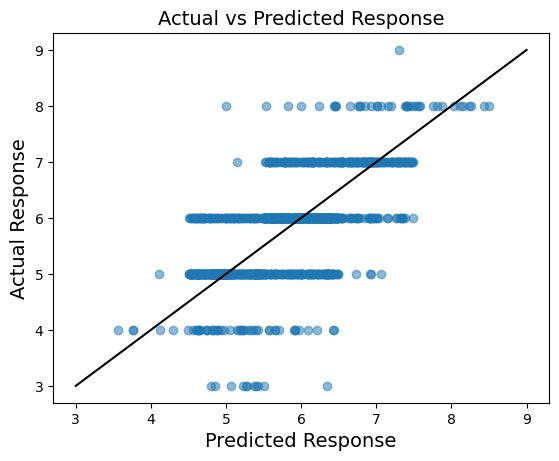

In [ ]:
plt.scatter(jittered_pred, y_test, alpha = 0.5)
plt.xlabel('Predicted Response', fontsize = 14)
plt.ylabel('Actual Response', fontsize = 14)
plt.title('Actual vs Predicted Response', fontsize = 14)
plt.plot(x, x, c = 'k');

In [ ]:
en2 = VotingRegressor(estimators = [('xgb', model_xgb), ('ada', model_ada),
                                    ('rf', model_rf), ('cat', model_cat),
                                    ('lgbm', model_lgbm), ('gb', model_gb),
                                    ('bag', model_bag)])
en2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.6,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.0...
                             <catboost.core.CatBoostRegressor object at 0x7f4bc52c2e90>),
                            ('lgbm', LGBMRegressor()),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.08,
                                                       loss='huber',
                                                       max_depth=9,
                                                       n_estimators=1300,
                                                       random_state=1,
                                                       subsample=0.85)),
                            ('bag',
                             BaggingRegressor(bootstrap=False,
                                              bootstrap_features=True,
                                              estimator=DecisionTreeRegressor(random_state=1),
                                              max_samples=0.75,
                                              n_estimators=1100, n_jobs=-1,
                                              random_state=1))])

In [ ]:
print("Ensemble model RMSE = ", np.sqrt(mean_squared_error(np.around(en.predict(X_test)), y_test)))

Ensemble model RMSE =  0.6510346794496848


## Stacking ensemble

In [26]:
# linear regression
linreg = LinearRegression().fit(train_df, y_train)
pred = linreg.predict(test_df)
print('RMSE for the linreg stacking ensemble =', np.sqrt(mean_squared_error(y_test, np.around(pred))))

RMSE for the linreg stacking ensemble = 0.6713934992009014


In [ ]:
# linear regression
linreg = LinearRegression().fit(train_df, y_train)
pred = linreg.predict(test_df)
print('RMSE for the linreg stacking ensemble =', np.sqrt(mean_squared_error(y_test, np.around(pred))))

RMSE for the linreg stacking ensemble = 0.6713934992009014


In [27]:
# lasso
alphas = 10**np.linspace(0, -3, 300)*0.5
lassocv = LassoCV(alphas = alphas, cv = 5, max_iter = 100000)
lassocv.fit(train_df, y_train)
print('opt alpha = ', lassocv.alpha_)

lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(train_df, y_train)
pred = lasso.predict(test_df)
print('RMSE for the lasso stacking ensemble =', np.sqrt(mean_squared_error(y_test, np.around(pred))))

opt alpha =  0.0005
RMSE for the lasso stacking ensemble = 0.6598368096617643


In [ ]:
# lasso
alphas = 10**np.linspace(0, -3, 300)*0.5
lassocv = LassoCV(alphas = alphas, cv = 5, max_iter = 100000)
lassocv.fit(train_df, y_train)
print('opt alpha = ', lassocv.alpha_)

lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(train_df, y_train)
pred = lasso.predict(test_df)
print('RMSE for the lasso stacking ensemble =', np.sqrt(mean_squared_error(y_test, np.around(pred))))

opt alpha =  0.0005
RMSE for the lasso stacking ensemble = 0.6598368096617643


In [ ]:
# mars
mars_model = Earth(max_degree=1)
mars_model.fit(train_df, y_train)
pred = mars_model.predict(test_df)
print('RMSE for the mars stacking ensemble', np.sqrt(mean_squared_error(y_test, np.around(pred))))

RMSE for the mars stacking ensemble 0.6592536572635639


In [ ]:
# random forest
start_time = time.time()
param_grid = {'n_estimators': [100],
              'max_depth': [8, 10, 12, 14],
              'max_leaf_nodes':[100, 500, 1000],
              'max_features': [2, 4, 6, 8],
              'max_samples': [1000, 2000, 3000]}

cv = KFold(n_splits = 4, shuffle=True, random_state=1)
optimal_params = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=1),                                                       
                                    param_distributions = param_grid, n_iter = 100,
                                    scoring = 'neg_mean_squared_error',
                                    n_jobs=-1, verbose = 1, cv = cv)
optimal_params.fit(train_df, y_train)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation mse = ", -optimal_params.best_score_)
print("Time taken = ", round((time.time()-start_time)/60), " minutes")

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Optimal parameter values = {'n_estimators': 100, 'max_samples': 3000, 'max_leaf_nodes': 100, 'max_features': 6, 'max_depth': 14}
Optimal cross validation mse =  0.0002974124474447799
Time taken =  0  minutes


In [ ]:
rf_model = RandomForestRegressor(n_estimators = 100, max_samples = 3000, 
                                 max_leaf_nodes = 1000, max_features = 6,
                                 verbose = False, max_depth = 10,
                                 n_jobs= -1).fit(train_df, y_train)

print('Test RMSE', np.sqrt(mean_squared_error(y_test, np.around(rf_model.predict(test_df)))))

Test RMSE 0.6486672727749033


In [ ]:
# xgboost
start_time = time.time()
param_grid = {'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.008, 0.01, 0.025, 0.05],
              'reg_lambda':[0, 1, 5],
              'n_estimators':[500, 600, 800, 1000],
              'gamma': [0, 3, 5, 10],
              'subsample': [0.5, 0.75, 1.0],
              'colsample_bytree': [0.5, 0.75, 1.0]}

cv = KFold(n_splits = 4, shuffle = True, random_state=1)
optimal_params = RandomizedSearchCV(estimator= XGBRegressor(random_state=1),                                                       
                                    param_distributions = param_grid, n_iter = 100,
                                    scoring = 'neg_mean_squared_error',
                                    n_jobs=-1, verbose = 1, cv = cv)
optimal_params.fit(train_df,y_train)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation mse = ", -optimal_params.best_score_)
print("Time taken = ", round((time.time()-start_time)/60), " minutes")

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Optimal parameter values = {'subsample': 0.75, 'reg_lambda': 0, 'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.025, 'gamma': 0, 'colsample_bytree': 1.0}
Optimal cross validation mse =  5.313397411774716e-07
Time taken =  1  minutes


In [ ]:
xgb_model = XGBRegressor(subsample = 0.75, reg_lambda = 0, n_estimators = 600, 
                         max_depth = 3, learning_rate = 0.025, gamma = 0,
                         colsample_bytree = 1, random_state = 1).fit(train_df, y_train)
print('Test RMSE', np.sqrt(mean_squared_error(y_test, np.around(xgb_model.predict(test_df)))))

Test RMSE 0.6753916242846414


## Ensemble of ensembles

In [ ]:
pred = (linreg.predict(test_df) + lasso.predict(test_df) + rf_model.predict(test_df) 
        + mars_model.predict(test_df) + xgb_model.predict(test_df))/5
print('rmse for the voting ensemble model:', np.sqrt(mean_squared_error(y_test, np.around(pred))))

rmse for the voting ensemble model: 0.6615831827459853


In [ ]:
p = np.linspace(0, 1, 100)
rmses = []
for i in p:
  base = np.floor(pred)
  diff = pred - base
  # cast to a list
  new_pred = base + np.array([int(x == True) for x in (diff > i)])
  rmse = np.sqrt(mean_squared_error(y_test, np.around(new_pred)))
  rmses.append(rmse)

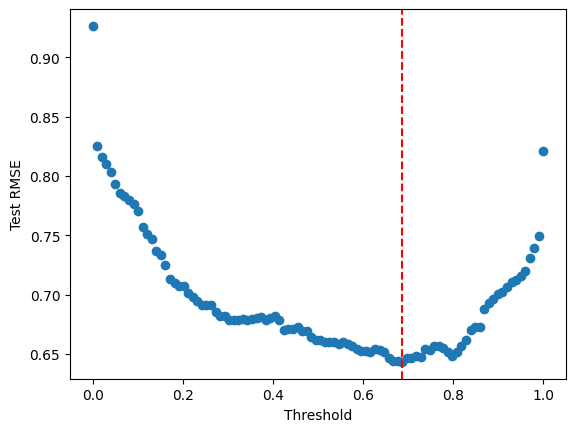

In [ ]:
plt.scatter(p, rmses)
plt.axvline(p[np.array(rmses).argmin()], ls = '--', c = 'r')
plt.xlabel('Threshold')
plt.ylabel('Test RMSE');

In [ ]:
# best test rmse after tunning the threshold
np.array(rmses).min()

0.6433087546786177

In [ ]:
opt_thresh = p[np.array(rmses).argmin()]
new_pred = base + np.array([int(x == True) for x in (diff > opt_thresh)])

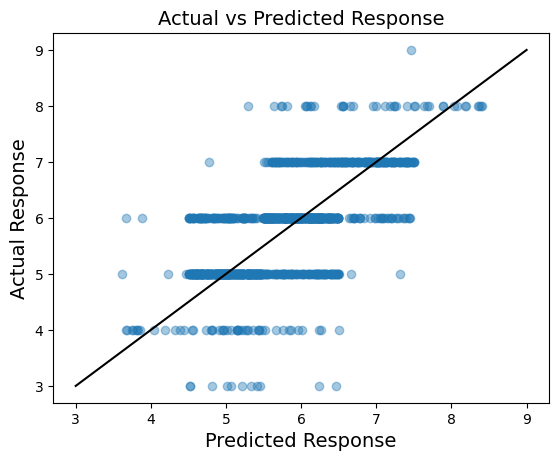

In [ ]:
jitter_amount = 0.5
jittered_pred = new_pred + np.random.uniform(low=-jitter_amount, high=jitter_amount, size=len(new_pred))
x = np.linspace(3,9,1000)

plt.scatter(jittered_pred, y_test, alpha = 0.4)
plt.xlabel('Predicted Response', fontsize = 14)
plt.ylabel('Actual Response', fontsize = 14)
plt.title('Actual vs Predicted Response', fontsize = 14)
plt.plot(x, x, c = 'k');